# 🏠 Advanced California Housing Project: Production-Ready ML

## Welcome to the Next Level!

This notebook builds upon our previous California Housing regression project. Here, we move from **basic model experiments** to **production-grade workflows**. You'll learn how to:

1. Build **scikit-learn pipelines** to streamline preprocessing and modeling.
2. Integrate **MLflow** for experiment tracking and reproducibility.
3. Train **advanced regression models** beyond Linear, Ridge, and Lasso.
4. Perform **cross-validation** and **hyperparameter tuning** for optimal performance.
5. Conduct **robust evaluation and comparison** using multiple metrics.
6. Deploy a **user-friendly Streamlit interface** for predictions (replacing Gradio).

---

## 🎯 Learning Goals

* Understand **modern ML workflows** used in industry.
* Build **scalable and maintainable pipelines** for real-world data.
* Apply **best practices** for model evaluation and reproducibility.
* Transition your ML experiments from **notebook prototypes** to **production-ready apps**.

> ⚡ **Pro Tip:** Keep your code modular and well-documented—this is key to production readiness!


# 🛠️ Production Environment Setup

Before we dive into building **advanced pipelines, models, and tracking experiments**, we need to establish a **robust production-ready environment**. This ensures that:

1. **Experiments are reproducible**  
   - Fixed random seeds, consistent preprocessing, and standardized metrics ensure that results can be trusted and reproduced later.

2. **Our workflow is organized and maintainable**  
   - Proper imports, library versions, and modular code make it easy for teams to collaborate.

3. **Models can be tracked and versioned**  
   - Using **MLflow**, we log experiments, hyperparameters, and metrics for easy comparison and auditability.

4. **Scalability and flexibility**  
   - Preconfigured pipelines, preprocessing tools, and ML libraries allow us to handle larger datasets or swap models seamlessly.

---

> 💡 **Pro Tip:** Think of this step as setting the foundation of a building — if it’s strong and well-organized, everything built on top will be reliable, scalable, and easier to maintain.


In [8]:
# 🛠️ Advanced imports for production ML

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

# 🔧 Core Python libraries
import numpy as np           # Efficient numerical computations
import pandas as pd          # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Advanced visualization
from scipy import stats      # Statistical functions
import joblib               # Save/load large models and preprocessing objects
import json                 # Handle JSON configs and outputs
from datetime import datetime  # Timestamping for logs
import os                   # File system operations
import time                 # Time tracking for experiments

# 🧰 Sklearn libraries - expanded for advanced ML workflows
from sklearn.datasets import fetch_california_housing  # Real-world dataset
from sklearn.model_selection import (
    train_test_split,     # Split data into train/test sets
    cross_val_score,      # Cross-validation scoring
    GridSearchCV,         # Hyperparameter tuning (grid search)
    RandomizedSearchCV    # Hyperparameter tuning (randomized search)
)
from sklearn.preprocessing import (
    StandardScaler,       # Feature scaling (zero-mean, unit variance)
    RobustScaler,         # Scaling robust to outliers
    PolynomialFeatures    # Generate polynomial features for non-linear relationships
)
from sklearn.pipeline import Pipeline, FeatureUnion  # Build modular pipelines
from sklearn.compose import ColumnTransformer         # Apply different preprocessing to columns
from sklearn.feature_selection import (
    SelectKBest,          # Univariate feature selection
    f_regression,         # Scoring function for regression
    RFE                   # Recursive feature elimination
)
from sklearn.linear_model import (
    LinearRegression,     # Baseline regression
    Ridge,                # L2-regularized regression
    Lasso,                # L1-regularized regression
    ElasticNet            # Combination of L1 and L2 regularization
)
from sklearn.ensemble import (
    RandomForestRegressor,       # Ensemble of decision trees
    GradientBoostingRegressor,   # Boosted trees for regression
    VotingRegressor              # Combine multiple regressors
)
from sklearn.svm import SVR               # Support Vector Regression
from sklearn.metrics import (
    mean_squared_error,  # Regression metric
    r2_score,            # Regression metric
    mean_absolute_error  # Regression metric
)
from sklearn.inspection import (
    permutation_importance,       # Feature importance
    PartialDependenceDisplay      # Partial dependence plots
)

# 🧪 Advanced model tracking with MLflow
import mlflow                  # Experiment tracking
import mlflow.sklearn          # Log sklearn models
from mlflow.models.signature import infer_signature  # Auto-capture input/output schema for reproducible deployment


# 🎛️ Configuration & Reproducibility

Before we start modeling, it’s crucial to **establish reproducible and scalable experiment settings**. This ensures that results are consistent, experiments are traceable, and your workflow is production-ready.

### Key Components:

1. **Reproducibility**
   - `RANDOM_STATE = 42`: Ensures that every run produces the same train/test splits, random sampling, and model results.
   - `TEST_SIZE = 0.2`: Reserves 20% of the data for final evaluation.
   - `VAL_SIZE = 0.2`: Reserves a portion of the training data for validation and hyperparameter tuning.
   - `CV_FOLDS = 5`: Use 5-fold cross-validation to evaluate models robustly.
   - `N_JOBS = -1`: Utilizes all available CPU cores to speed up computations.

2. **Organized Project Structure**
   - `MODEL_DIR = "models"`: All trained models are stored in a dedicated folder.
   - `EXPERIMENT_DIR = "experiments"`: All MLflow experiment logs, metrics, and artifacts are saved in a centralized location.
   - `os.makedirs(..., exist_ok=True)`: Ensures directories exist, preventing file errors during training or logging.

3. **MLflow Experiment Tracking**
   - `mlflow.set_tracking_uri(...)` points MLflow to the experiment folder.
   - `mlflow.set_experiment(experiment_name)` creates a named experiment for this project.
   - This allows you to **log models, metrics, and hyperparameters**, enabling easy comparison across experiments.

> 💡 **Pro Tip:** Proper configuration and tracking is like laying the foundation of a building—everything built on top will be reliable, reproducible, and easy to maintain.


In [15]:
class Config:
    # Reproducibility - Critical for production!
    RANDOM_STATE = 42
    TEST_SIZE = 0.2
    VAL_SIZE = 0.2  # NEW: Validation set for tuning
    CV_FOLDS = 5
    N_JOBS = -1  # Use all available cores
    
    # Model directories - Organized project structure
    MODEL_DIR = "models"
    EXPERIMENT_DIR = "experiments"
    
    # Create directories if they don't exist
    os.makedirs(MODEL_DIR, exist_ok=True)
    os.makedirs(EXPERIMENT_DIR, exist_ok=True)
    
config = Config()

# Initialize MLflow for experiment tracking
mlflow.set_tracking_uri(f"file://{os.path.abspath(config.EXPERIMENT_DIR)}")
experiment_name = "california_housing_advanced"
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location=('file:///home/silva/SILVA.AI/Projects/SAIR/Week '
 '1/experiments/439476538156974298'), creation_time=1760710524262, experiment_id='439476538156974298', last_update_time=1760710524262, lifecycle_stage='active', name='california_housing_advanced', tags={}>

In [16]:
# Load data (same as previous notebook)
from sklearn.datasets import fetch_california_housing
import numpy as np

california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

print("📊 Original Features (from previous notebook):")
for i, feature in enumerate(feature_names):
    print(f"  {i+1:2d}. {feature}")

📊 Original Features (from previous notebook):
   1. MedInc
   2. HouseAge
   3. AveRooms
   4. AveBedrms
   5. Population
   6. AveOccup
   7. Latitude
   8. Longitude


# 🧠 Advanced Feature Engineering

In the previous version of this project, we used a **simple function** `add_engineered_features()` to manually add a few **domain-driven features**, such as:

- `RoomsPerBedroom` → room-to-bedroom ratio  
- `PopulationDensity` → population per household  
- `BedroomRatio` → bedroom-to-room ratio  

This worked well for experimentation, but it **wasn't easily integrated into an ML pipeline**.  
It also **didn't automatically track feature names** or fit neatly into scikit-learn workflows.

---

## 🚀 New Approach: `AdvancedFeatureEngineer` Class

We now use a **custom transformer class** that follows the scikit-learn API (`fit`, `transform`, `fit_transform`).  
This makes our feature engineering:

### ✅ **Modular and Reusable**
- Can be plugged directly into a `Pipeline` or `ColumnTransformer`.
- No need to manually apply transformations for train/test splits.

### 🧭 **More Expressive Features**
We added richer, domain-inspired features:
- `DistFromCenter` → Geographical distance approximation  
- `RoomToBedroomRatio` → Room size indicator  
- `IncomePerRoom` → Economic density proxy  
- `PopulationDensity` → Refined population per occupancy  
- `IncomeTimesRooms` → Interaction term capturing non-linear effects  
- `GeoQuadrant` → A simplified categorical segmentation based on latitude & longitude

### 🏗️ **Pipeline Friendly**
- Works seamlessly with other preprocessing steps (e.g., scaling, encoding).
- Tracks feature names for better interpretability.
- Prevents manual errors and improves reproducibility.

---

> 💡 **Pro Tip:** Turning feature engineering into a reusable transformer is a **best practice in production ML** — it allows you to deploy exactly the same transformation logic during training and inference, ensuring consistency.


In [17]:

# NEW: Advanced Feature Engineering Class
class AdvancedFeatureEngineer:
    """Advanced feature engineering using domain knowledge"""
    
    def __init__(self):
        self.feature_names = []
    
    def fit(self, X, y=None):
        return self  # No fitting needed for this transformer
    
    def transform(self, X):
        X_eng = X.copy()
        
        # DOMAIN-DRIVEN FEATURE ENGINEERING:
        X_eng = np.column_stack([
            X_eng,
            # Distance from center (simplified)
            np.sqrt((X_eng[:, 6] - 36.5)**2 + (X_eng[:, 7] + 119.5)**2),
            # Room-to-bedroom ratio (indicates room sizes)
            X_eng[:, 2] / (X_eng[:, 3] + 1e-8),  # Avoid division by zero
            # Income per room (economic indicator)
            X_eng[:, 0] / (X_eng[:, 2] + 1e-8),
            # Population density 
            X_eng[:, 4] / (X_eng[:, 5] + 1e-8),
            # Interaction: Income × Rooms (combined effect)
            X_eng[:, 0] * X_eng[:, 2],
            # Geographic quadrant (categorical-like)
            (X_eng[:, 6] > 36.5).astype(int) * 2 + (X_eng[:, 7] > -119.5).astype(int)
        ])
        
        # Update feature names for interpretability
        self.feature_names = list(feature_names) + [
            'DistFromCenter', 'RoomToBedroomRatio', 'IncomePerRoom',
            'PopulationDensity', 'IncomeTimesRooms', 'GeoQuadrant'
        ]
        
        return X_eng

    def fit_transform(self, X, y=None):
        """Mimics sklearn's fit_transform"""
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names(self):
        return self.feature_names
        
# Test our feature engineering
engineer = AdvancedFeatureEngineer()
X_engineered = engineer.fit_transform(X)

print(f"\n🎯 FEATURE ENGINEERING COMPLETE!")
print(f"• Original features: {X.shape[1]} (from previous work)")
print(f"• Engineered features: {X_engineered.shape[1]} (NEW!)")
print(f"• New features created: {engineer.feature_names[-6:]}")



🎯 FEATURE ENGINEERING COMPLETE!
• Original features: 8 (from previous work)
• Engineered features: 14 (NEW!)
• New features created: ['DistFromCenter', 'RoomToBedroomRatio', 'IncomePerRoom', 'PopulationDensity', 'IncomeTimesRooms', 'GeoQuadrant']


## 🧭 Outlier Handling with IQR — Making the Data More Robust

In the **previous notebook**, our preprocessing pipeline we made StandardScaler()

This was a **good starting point**, but it only applied  — meaning it didn’t actually address **outliers**, which can **skew scaling and hurt model performance**.

---

## 🚀 Why Upgrade to IQR-Based Outlier Handling

Outliers can **distort model training**, especially for algorithms sensitive to input scale (e.g., Linear Regression, Ridge, Lasso, SVM).
To fix this, we introduce a **dedicated outlier handling stage** *before* scaling.

### 🧮 IQR Outlier Detection Logic

For each feature:

1. Calculate **Q1 (25th percentile)** and **Q3 (75th percentile)**.
2. Compute **IQR = Q3 − Q1**.
3. Define:
   $$
   \text{Lower Bound} = Q1 - 1.5 \times IQR
   \quad
   \text{Upper Bound} = Q3 + 1.5 \times IQR
   $$
4. Clip any values outside this range to make the distribution **more stable**.

✅ **Why this matters:**

* Stabilizes scaling
* Reduces the influence of extreme values
* Keeps the data intact (no row deletion)
* Makes the pipeline more production-ready



In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

# NEW: Outlier Handler for Robust Models
class OutlierHandler(BaseEstimator, TransformerMixin):
    """Handle outliers using IQR method - More robust than simple scaling"""
    
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds_ = None
        self.upper_bounds_ = None
    
    def fit(self, X, y=None):
        self.lower_bounds_ = []
        self.upper_bounds_ = []
        
        # Calculate IQR bounds for each feature
        for i in range(X.shape[1]):
            Q1 = np.percentile(X[:, i], 25)  # 25th percentile
            Q3 = np.percentile(X[:, i], 75)  # 75th percentile  
            IQR = Q3 - Q1  # Interquartile Range
            self.lower_bounds_.append(Q1 - self.factor * IQR)
            self.upper_bounds_.append(Q3 + self.factor * IQR)
        
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        # Clip values to IQR bounds
        for i in range(X.shape[1]):
            lower = self.lower_bounds_[i]
            upper = self.upper_bounds_[i]
            X_transformed[:, i] = np.clip(X_transformed[:, i], lower, upper)
        
        return X_transformed

## 🏗️ Building the Final Preprocessing Pipeline

We’ve now developed and tested each **individual component** of our preprocessing workflow:

1. 🧠 **`AdvancedFeatureEngineer`** → creates new **domain-informed features** (e.g., distance from center, ratios, interactions).
2. 🧹 **`OutlierHandler`** → detects and **clips extreme values** using the IQR method for robust statistics.
3. 📏 **`RobustScaler`** → scales features in a way that’s **less sensitive to outliers** compared to `StandardScaler`.

> 🆚 *In the previous notebook, we only used a simple scaler (and optional polynomial expansion).
> Now, we’re assembling a **production-grade** data pipeline with layered transformations.*

---

## 🚀 Why a Unified Pipeline Matters

✅ Ensures **clean, reproducible transformations**
✅ Keeps preprocessing **modular and maintainable**
✅ Integrates seamlessly with model training & cross-validation
✅ Allows us to **deploy the same pipeline** in production (no data leakage)

---

## 🧪 Let’s Build It

We’ll combine all steps into a single `Pipeline` object:


In [19]:

# Create comprehensive preprocessing pipeline
preprocessor = Pipeline([
    ('feature_engineer', AdvancedFeatureEngineer()),  # Our new features
    ('outlier_handler', OutlierHandler(factor=1.5)),  # Handle outliers
    ('scaler', RobustScaler())  # Robust to outliers (better than StandardScaler)
])

# Apply preprocessing pipeline
print("🔄 Applying preprocessing pipeline...")
X_processed = preprocessor.fit_transform(X, y)

print("✅ ADVANCED PREPROCESSING PIPELINE BUILT!")
print(f"📊 Processed data shape: {X_processed.shape}")
print(f"🎯 All feature names: {preprocessor.named_steps['feature_engineer'].get_feature_names()}")

🔄 Applying preprocessing pipeline...
✅ ADVANCED PREPROCESSING PIPELINE BUILT!
📊 Processed data shape: (20640, 14)
🎯 All feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'DistFromCenter', 'RoomToBedroomRatio', 'IncomePerRoom', 'PopulationDensity', 'IncomeTimesRooms', 'GeoQuadrant']


Of course ✅
Here’s a **clear and motivating Markdown explanation** to place **right before** your improved data-splitting code:

---

## 🧪 Smarter Data Splitting: Adding a Validation Set

In the **previous notebook**, we used a simple **train-test split**:

This works fine for quick experiments, but it has some **limitations** when building **production-level ML systems**:

* ❌ Hyperparameter tuning used part of the training set, risking data leakage.
* ❌ No separate holdout set to evaluate generalization during tuning.
* ❌ Test set was indirectly “influenced” by decisions made during training.

---

## 🆕 Better Approach: Train / Validation / Test Split

To solve these issues, we **add a validation set** between training and testing:

* 🧠 **Train set** → Used to train the model.
* 🧪 **Validation set** → Used to tune hyperparameters, early stopping, and model selection.
* 🧭 **Test set** → Kept **completely unseen** until the very end for final evaluation.

This separation ensures:

* ✅ Cleaner model evaluation
* ✅ More reliable hyperparameter tuning
* ✅ Reduced overfitting to the test set
* ✅ More realistic production performance estimation

---


> 💡 **Pro Tip:** Keeping the **test set locked away** until the final step is a good MLOps practice — it gives you the clearest picture of real-world performance.

## 🧱 Implementation:


In [21]:
# Improved data splitting with validation set
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y, test_size=config.TEST_SIZE, random_state=config.RANDOM_STATE
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=config.VAL_SIZE, random_state=config.RANDOM_STATE
)


print(f"📊 DATA SPLITS (IMPROVED from previous notebook):")
print(f"• Training: {X_train.shape[0]:,} samples (model learning)")
print(f"• Validation: {X_val.shape[0]:,} samples (hyperparameter tuning)") 
print(f"• Test: {X_test.shape[0]:,} samples (final evaluation - NEVER TOUCHED until end)")

📊 DATA SPLITS (IMPROVED from previous notebook):
• Training: 13,209 samples (model learning)
• Validation: 3,303 samples (hyperparameter tuning)
• Test: 4,128 samples (final evaluation - NEVER TOUCHED until end)


Of course ✅
Here’s a **comprehensive and motivating Markdown explanation** to place **before your advanced model definition code**, expanding on the simple model list you used previously:

---

## 🧠 Expanding Our Model Arsenal: From Basics to Advanced

In the **previous notebook**, we kept our model set simple — focusing on:

```python
# OLD: Simple baseline models
'Model': ['Linear Regression', 'Ridge (best)', 'Lasso (best)', 'Polynomial (deg=2)']
```

This was great for:

* ✅ Establishing **baseline performance**
* ✅ Understanding core concepts like regularization (`Ridge`, `Lasso`)
* ✅ Demonstrating feature transformation with polynomial terms

But real-world problems often demand **stronger models** that can capture **nonlinearities**, **complex interactions**, and **robust generalization**.

---

## 🆕 Introducing Advanced Models

We now upgrade our model set to include a **diverse mix of linear, regularized, tree-based, and ensemble learners**:

| Model Name                     | Type                  | Why We Add It 🧭                                                    |
| ------------------------------ | --------------------- | ------------------------------------------------------------------- |
| `LinearRegression`             | Linear Baseline       | A clean baseline — interpretable and fast.                          |
| `Ridge Regression`             | Regularized Linear    | Controls overfitting with L2 regularization.                        |
| `Lasso Regression`             | Regularized Linear    | Performs **feature selection** via L1 penalty.                      |
| `ElasticNet` 🆕                | Hybrid Regularization | Combines L1 + L2 — more flexible for correlated features.           |
| `RandomForestRegressor` 🆕     | Tree Ensemble         | Handles nonlinearities & interactions without feature engineering.  |
| `GradientBoostingRegressor` 🆕 | Boosting Ensemble     | Learns sequentially, improving weak learners over time.             |
| `Support Vector Regression` 🆕 | Kernel Method         | Captures complex relationships using kernel tricks.                 |
| `VotingRegressor` 🆕           | Ensemble Strategy     | Combines multiple models for **stronger, more stable performance**. |

---

## ⚡ Why This Matters in Production

✅ **Model diversity** improves your chances of finding a high-performing model.
✅ **Regularized models** give stability and interpretability.
✅ **Ensemble methods** usually outperform single models in complex tasks.
✅ **Nonlinear models** can capture patterns linear models miss.

This setup also makes it easy to:

* 📊 Compare models consistently
* 🧪 Run hyperparameter tuning later
* 🧠 Blend models into a **final ensemble**

---

## 🧱 Implementation



In [24]:
# define advanced models - Expanded from previous work
advanced_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=config.RANDOM_STATE),
    'Lasso Regression': Lasso(random_state=config.RANDOM_STATE),
    'ElasticNet': ElasticNet(random_state=config.RANDOM_STATE),  # NEW: Combines L1 + L2
    'Random Forest': RandomForestRegressor(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS),
    'Gradient Boosting': GradientBoostingRegressor(random_state=config.RANDOM_STATE),  # NEW: Sequential learning
    'Support Vector Regression': SVR(),  # NEW: Different approach
}

# NEW: Voting Ensemble - Combines multiple models
voting_ensemble = VotingRegressor([
    ('ridge', Ridge(random_state=config.RANDOM_STATE)),
    ('rf', RandomForestRegressor(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS)),
    ('gb', GradientBoostingRegressor(random_state=config.RANDOM_STATE))
])

advanced_models['Voting Ensemble'] = voting_ensemble

print(f"\n🎯 MODEL PORTFOLIO ({len(advanced_models)} models):")


🎯 MODEL PORTFOLIO (8 models):



## 🧹Step-by-Step lets build the model training and logging with mlflow 
# Helper 1: Basic Training & Evaluation
This helper focuses only on:

training the model,

predicting on both train and validation sets, and

calculating key metrics (RMSE, R², MAE, training time, overfitting gap).


In [25]:
# ===========================
# 📦 Helper 1 — Basic training and evaluation
# ===========================
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    """Train model and compute basic metrics on train and validation sets."""
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    metrics = {
        "train_rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "val_rmse": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "train_r2": r2_score(y_train, y_train_pred),
        "val_r2": r2_score(y_val, y_val_pred),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "val_mae": mean_absolute_error(y_val, y_val_pred),
        "training_time": training_time,
        "overfitting_gap": r2_score(y_train, y_train_pred) - r2_score(y_val, y_val_pred)
    }

    return metrics, model

# Helper 2: Cross-Validation

It evaluates how well a model generalizes to **unseen data** using **cross-validation** — instead of just relying on a single train–validation split.

---

### ⚡ Step-by-step breakdown:

1. **`cross_val_score`** from `sklearn.model_selection`
   This function automatically:

   * Splits your training set into multiple folds (e.g., 5 parts).
   * Trains the model on `k-1` folds (e.g., 4 folds).
   * Tests the model on the remaining fold.
   * Repeats this process `k` times (rotating the test fold each time).

   👉 This is called **k-fold cross-validation**.

---

2. **`scoring='r2'`**

   * We use **R² score** (coefficient of determination) as the evaluation metric.
   * R² tells us how much variance in the target variable is explained by the model.
   * Higher R² → better model fit.

---

3. **`cv=cv_folds`**

   * The number of folds is taken from the config file (e.g., `cv_folds = 5` means 5-fold cross-validation).

---

4. **`n_jobs=config.N_JOBS`**

   * This runs the cross-validation in parallel using all CPU cores, making it **much faster**.

---

5. **`cv_scores.mean()` and `cv_scores.std()`**

   * After cross-validation, we’ll get 5 R² scores (one for each fold).
   * We return:

     * `mean`: average performance across folds → **robust performance estimate**
     * `std`: standard deviation of performance → **stability of the model**

---

### 🧠 Why it matters:

* If your model performs well across all folds → it’s **robust**.
* If it performs well on some folds and badly on others (high std) → the model is **unstable or overfitting**.
* Cross-validation is **more reliable** than using only a single validation set.


In [26]:
# ===========================
# 📦 Helper 2 — Cross-validation
# ===========================
def compute_cross_validation(model, X_train, y_train, cv_folds=config.CV_FOLDS):
    """Run cross-validation and return mean and std of R² scores."""
    cv_scores = cross_val_score(model, X_train, y_train,
                                cv=cv_folds, scoring='r2', n_jobs=config.N_JOBS)
    return cv_scores.mean(), cv_scores.std()

### 📦 Helper 3 — MLflow Logging

This helper function simplifies **experiment tracking with MLflow** by:

1. **Logging model hyperparameters** → so you know exactly how the model was configured.
2. **Logging evaluation metrics** → includes training/validation scores and cross-validation results.
3. **Saving the model artifact** → allows you to **reproduce or deploy** the exact trained model later.

> Using this function ensures that each experiment is **cleanly tracked, reproducible, and easy to compare** without cluttering your main training code.


In [27]:
# ===========================
# 📦 Helper 3 — MLflow Logging
# ===========================
def log_to_mlflow(model, metrics, cv_mean, cv_std, run_name):
    """Log params, metrics, and model to MLflow in a clean, minimal way."""
    with mlflow.start_run(run_name=run_name):
        # 1. Log hyperparameters
        mlflow.log_params(model.get_params())
        
        # 2. Log main metrics
        for k, v in metrics.items():
            if k != 'training_time':  # avoid logging long times directly
                mlflow.log_metric(k, float(v))
        mlflow.log_metric("cv_r2_mean", float(cv_mean))
        mlflow.log_metric("cv_r2_std", float(cv_std))
        
        # 3. Save model artifact
        mlflow.sklearn.log_model(model, "model")



### 🚀 Advanced Model Evaluation

This function combines the full evaluation workflow into a **clean, easy-to-follow step**:

1. **Train & Evaluate** → fits the model and computes metrics on both training and validation sets.
2. **Cross-Validation** → estimates robust performance and stability using k-fold splits.
3. **MLflow Logging** → tracks hyperparameters, metrics, and saves the model artifact for reproducibility.

> ✅ With this structure, you get **all key insights and tracking** without cluttering your main training loop.


In [29]:
def evaluate_model_advanced(model, X_train, X_val, y_train, y_val, model_name):
    """Train, evaluate, cross-validate, and log model in a clean step-by-step way."""
    # 1. Train and evaluate
    metrics, trained_model = train_and_evaluate(model, X_train, y_train, X_val, y_val)
    
    # 2. Cross-validation
    cv_mean, cv_std = compute_cross_validation(model, X_train, y_train)
    metrics["cv_r2_mean"] = cv_mean
    metrics["cv_r2_std"] = cv_std
    
    # 3. Log everything to MLflow
    log_to_mlflow(model, metrics, cv_mean, cv_std, model_name)
    
    return metrics, trained_model

### 🎯 Run & Track All Advanced Models

This loop automates the **training, evaluation, and logging** of all selected models:

1. Iterates through each model in `advanced_models`.
2. Uses the simplified `evaluate_model_advanced` function to:

   * Train the model
   * Evaluate on training & validation sets
   * Run cross-validation
   * Log everything to MLflow
3. Records metrics and trained models in dictionaries for easy reference.
4. Displays **validation R²**, **cross-validation mean ± std**, and flags potential overfitting.

> ✅ This setup ensures **consistent evaluation, reproducibility, and clean experiment tracking** without manual repetition for each model.


In [30]:
print("🚀 STARTING ADVANCED MODEL EVALUATION...")
results = {}
trained_models = {}

for name, model in advanced_models.items():
    print(f"\n🔧 Training {name}...")
    metrics, trained_model = evaluate_model_advanced(model, X_train, X_val, y_train, y_val, name)
    
    results[name] = metrics
    trained_models[name] = trained_model

    overfit_flag = "⚠️" if metrics['overfitting_gap'] > 0.1 else "✅"
    print(f"✅ {name:20} | Val R²: {metrics['val_r2']:.4f} | "
          f"CV R²: {metrics['cv_r2_mean']:.4f} ± {metrics['cv_r2_std']:.4f} {overfit_flag}")

print("\n📈 All models trained and logged to MLflow!")
print(f"💡 Launch MLflow UI with: mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}")

🚀 STARTING ADVANCED MODEL EVALUATION...

🔧 Training Linear Regression...


2025/10/18 03:15:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:15:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:15:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Linear Regression    | Val R²: 0.6763 | CV R²: 0.6798 ± 0.0086 ✅

🔧 Training Ridge Regression...


2025/10/18 03:15:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:15:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:15:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Ridge Regression     | Val R²: 0.6762 | CV R²: 0.6798 ± 0.0087 ✅

🔧 Training Lasso Regression...


2025/10/18 03:15:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:15:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:15:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Lasso Regression     | Val R²: -0.0005 | CV R²: -0.0003 ± 0.0003 ✅

🔧 Training ElasticNet...


2025/10/18 03:15:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:15:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:15:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ ElasticNet           | Val R²: 0.1077 | CV R²: 0.1091 ± 0.0035 ✅

🔧 Training Random Forest...


2025/10/18 03:16:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:17:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:17:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest        | Val R²: 0.8138 | CV R²: 0.8045 ± 0.0074 ⚠️

🔧 Training Gradient Boosting...


2025/10/18 03:17:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:17:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:17:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting    | Val R²: 0.7854 | CV R²: 0.7861 ± 0.0069 ✅

🔧 Training Support Vector Regression...


2025/10/18 03:18:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:18:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:18:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Support Vector Regression | Val R²: 0.7728 | CV R²: 0.7763 ± 0.0064 ✅

🔧 Training Voting Ensemble...


2025/10/18 03:20:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:20:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:20:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Voting Ensemble      | Val R²: 0.7873 | CV R²: 0.7860 ± 0.0064 ✅

📈 All models trained and logged to MLflow!
💡 Launch MLflow UI with: mlflow ui --backend-store-uri experiments



## Or use this implemtaino instead (ha ha ha) 😎

### 🚀 Full Advanced Model Evaluation (All-in-One)

This implementation runs the **entire model evaluation workflow in a single function**:

1. **Train the model** → records training time.
2. **Evaluate on training and validation sets** → computes RMSE, R², MAE, and overfitting gap.
3. **Cross-validation** → estimates model stability and performance variability across folds.
4. **MLflow logging** → automatically logs hyperparameters, metrics, and saves the model artifact.
5. **Loop over multiple models** → trains, evaluates, and tracks all models in one go, reporting **validation R², cross-validation mean ± std, and overfitting warnings**.

> ⚡ This approach is **straightforward for experimentation and reproducibility**, but can be overwhelming for beginners — consider the step-by-step version if clarity is preferred.

In [31]:
def evaluate_model_advanced(model, X_train, X_val, y_train, y_val, model_name):
    """Comprehensive model evaluation with MLflow tracking"""
    
    # Start MLflow run for experiment tracking
    with mlflow.start_run(run_name=model_name):
        # Train model with timing
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Predictions on both sets
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Calculate comprehensive metrics
        metrics = {
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'val_rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
            'train_r2': r2_score(y_train, y_train_pred),
            'val_r2': r2_score(y_val, y_val_pred),
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'val_mae': mean_absolute_error(y_val, y_val_pred),
            'training_time': training_time,
            'overfitting_gap': r2_score(y_train, y_train_pred) - r2_score(y_val, y_val_pred)
        }
        
        # AUTOMATIC TRACKING with MLflow
        mlflow.log_params(model.get_params())  # Log hyperparameters
        mlflow.log_metrics({k: v for k, v in metrics.items() if k != 'training_time'})
        mlflow.sklearn.log_model(model, "model")  # Save model artifact
        
        # Cross-validation for robust performance estimate
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=config.CV_FOLDS, scoring='r2', n_jobs=config.N_JOBS)
        metrics['cv_r2_mean'] = cv_scores.mean()
        metrics['cv_r2_std'] = cv_scores.std()
        
        mlflow.log_metrics({
            'cv_r2_mean': metrics['cv_r2_mean'],
            'cv_r2_std': metrics['cv_r2_std']
        })
        
        return metrics, model

print("🚀 STARTING ADVANCED MODEL EVALUATION...")
print("Each model is being trained, evaluated, and tracked in MLflow")

results = {}
trained_models = {}

for name, model in advanced_models.items():
    print(f"\n🔧 Training {name}...")
    metrics, trained_model = evaluate_model_advanced(
        model, X_train, X_val, y_train, y_val, name
    )
    results[name] = metrics
    trained_models[name] = trained_model
    
    # Progress reporting
    overfitting_indicator = "⚠️" if metrics['overfitting_gap'] > 0.1 else "✅"
    print(f"✅ {name:20} | Val R²: {metrics['val_r2']:.4f} | "
          f"CV R²: {metrics['cv_r2_mean']:.4f} ± {metrics['cv_r2_std']:.4f} "
          f"{overfitting_indicator}")

print(f"\n📈 All models trained and tracked in MLflow!")
print(f"💡 Check MLflow UI: mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}")

🚀 STARTING ADVANCED MODEL EVALUATION...
Each model is being trained, evaluated, and tracked in MLflow

🔧 Training Linear Regression...


2025/10/18 03:20:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:20:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:20:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/18 03:20:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Linear Regression    | Val R²: 0.6763 | CV R²: 0.6798 ± 0.0086 ✅

🔧 Training Ridge Regression...


2025/10/18 03:20:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:20:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/18 03:20:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Ridge Regression     | Val R²: 0.6762 | CV R²: 0.6798 ± 0.0087 ✅

🔧 Training Lasso Regression...


2025/10/18 03:20:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/18 03:20:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Lasso Regression     | Val R²: -0.0005 | CV R²: -0.0003 ± 0.0003 ✅

🔧 Training ElasticNet...


2025/10/18 03:20:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:20:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ ElasticNet           | Val R²: 0.1077 | CV R²: 0.1091 ± 0.0035 ✅

🔧 Training Random Forest...


2025/10/18 03:21:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:21:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:21:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest        | Val R²: 0.8138 | CV R²: 0.8045 ± 0.0074 ⚠️

🔧 Training Gradient Boosting...


2025/10/18 03:22:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:22:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:22:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting    | Val R²: 0.7854 | CV R²: 0.7861 ± 0.0069 ✅

🔧 Training Support Vector Regression...


2025/10/18 03:23:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:23:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:23:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Support Vector Regression | Val R²: 0.7728 | CV R²: 0.7763 ± 0.0064 ✅

🔧 Training Voting Ensemble...


2025/10/18 03:24:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:24:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:24:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Voting Ensemble      | Val R²: 0.7873 | CV R²: 0.7860 ± 0.0064 ✅

📈 All models trained and tracked in MLflow!
💡 Check MLflow UI: mlflow ui --backend-store-uri experiments


## 📊 Model Comparison & Visualization

In this section, we summarize and visualize the performance of all trained models. 

- First, we convert the `results` dictionary into a readable table.  
- Then, we create simple plots for key metrics to help interpret model performance:

1. **Validation R²** → Higher is better ✅  
2. **Validation RMSE** → Lower is better ✅  
3. **Overfitting Gap** → Closer to 0 is better ⚖️  

These visualizations make it easy for both technical and non-technical users to compare models at a glance.

📊 Model comparison table:


,Model,val_r2,val_rmse,val_mae,overfitting_gap,cv_r2_mean
0,Linear Regression,0.676257,0.668402,0.500376,0.004820,0.679809
1,Ridge Regression,0.676231,0.668429,0.500352,0.004846,0.679815
2,Lasso Regression,-0.000458,1.174998,0.925769,0.000458,-0.000341
3,ElasticNet,0.107701,1.109667,0.872249,0.001806,0.109119
4,Random Forest,0.813826,0.506871,0.336039,0.159938,0.804509
5,Gradient Boosting,0.785402,0.544190,0.379701,0.025768,0.786094
6,Support Vector Regression,0.772802,0.559938,0.373287,0.025383,0.776284
7,Voting Ensemble,0.787292,0.541788,0.380700,0.078636,0.786011


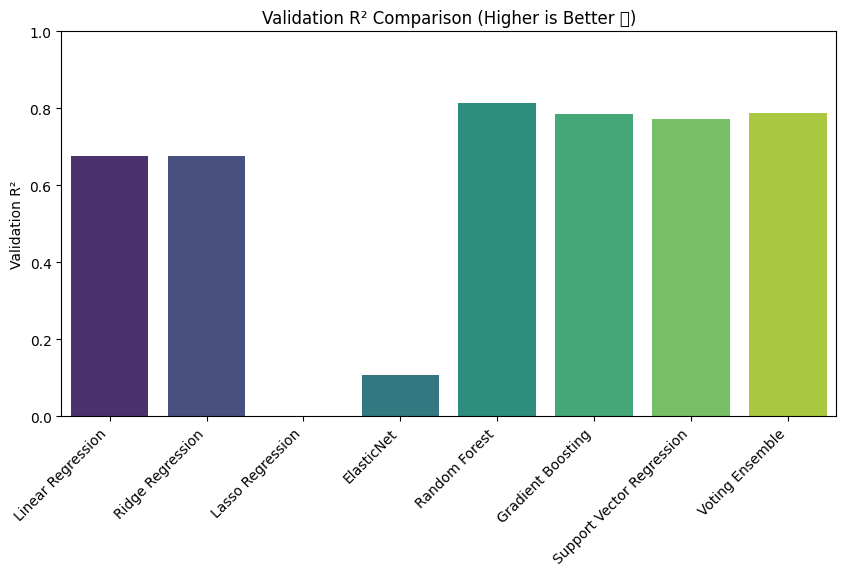

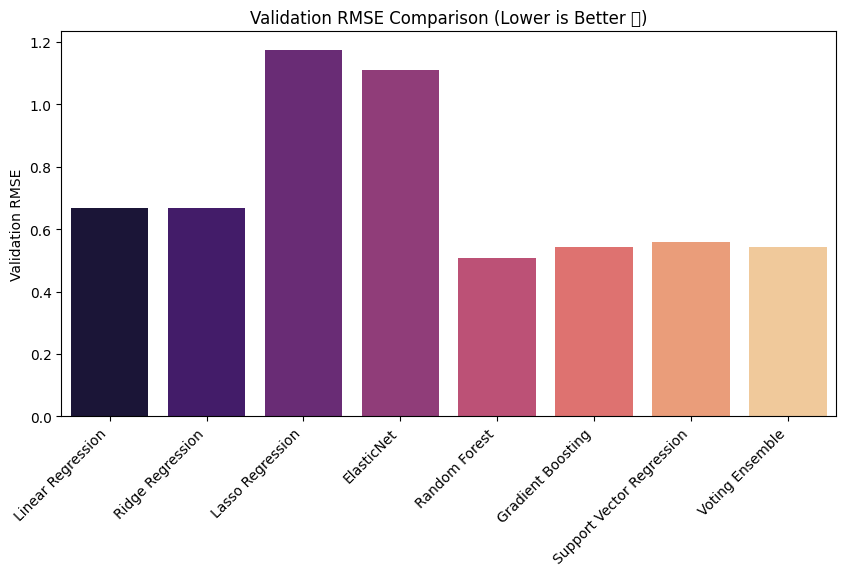

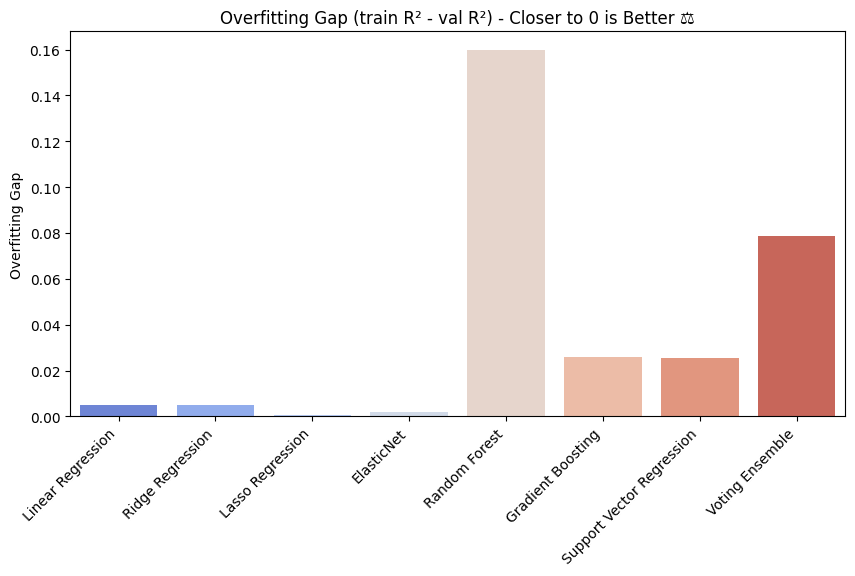

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1️⃣ Convert results dict to DataFrame
# ===========================
metrics_df = pd.DataFrame(results).T  # transpose so models are rows
metrics_df = metrics_df[['val_r2', 'val_rmse', 'val_mae', 'overfitting_gap', 'cv_r2_mean']]
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})

print("📊 Model comparison table:")
display(metrics_df)

# ===========================
# 2️⃣ Plot Validation R² (Higher is better)
# ===========================
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='val_r2', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Validation R² Comparison (Higher is Better ✅)')
plt.ylabel('Validation R²')
plt.xlabel('')
plt.ylim(0, 1)
plt.show()

# ===========================
# 3️⃣ Plot Validation RMSE (Lower is better)
# ===========================
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='val_rmse', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Validation RMSE Comparison (Lower is Better ✅)')
plt.ylabel('Validation RMSE')
plt.xlabel('')
plt.show()

# ===========================
# 4️⃣ Plot Overfitting Gap (Closer to 0 is better)
# ===========================
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='overfitting_gap', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Overfitting Gap (train R² - val R²) - Closer to 0 is Better ⚖️')
plt.ylabel('Overfitting Gap')
plt.xlabel('')
plt.show()


## (OPTIONAL) 📊 Advanced Model Comparison Visualization 
Read and explore this on your own time , its more advance and speclialized version of the previous one

📈 ADVANCED MODEL COMPARISON

🏆 MODEL PERFORMANCE RANKING
Model                     Val R²   CV R²        Overfitting  Time (s)  
--------------------------------------------------------------------------------
Random Forest              0.8138  0.8045 ± 0.0074  ⚠️  0.1599     10.37
Voting Ensemble            0.7873  0.7860 ± 0.0064   ✅  0.0786     26.66
Gradient Boosting          0.7854  0.7861 ± 0.0069   ✅  0.0258     16.92
Support Vector Regression  0.7728  0.7763 ± 0.0064   ✅  0.0254     19.41
Linear Regression          0.6763  0.6798 ± 0.0086   ✅  0.0048      0.02
Ridge Regression           0.6762  0.6798 ± 0.0087   ✅  0.0048      0.01
ElasticNet                 0.1077  0.1091 ± 0.0035   ✅  0.0018      0.03
Lasso Regression          -0.0005 -0.0003 ± 0.0003   ✅  0.0005      0.05


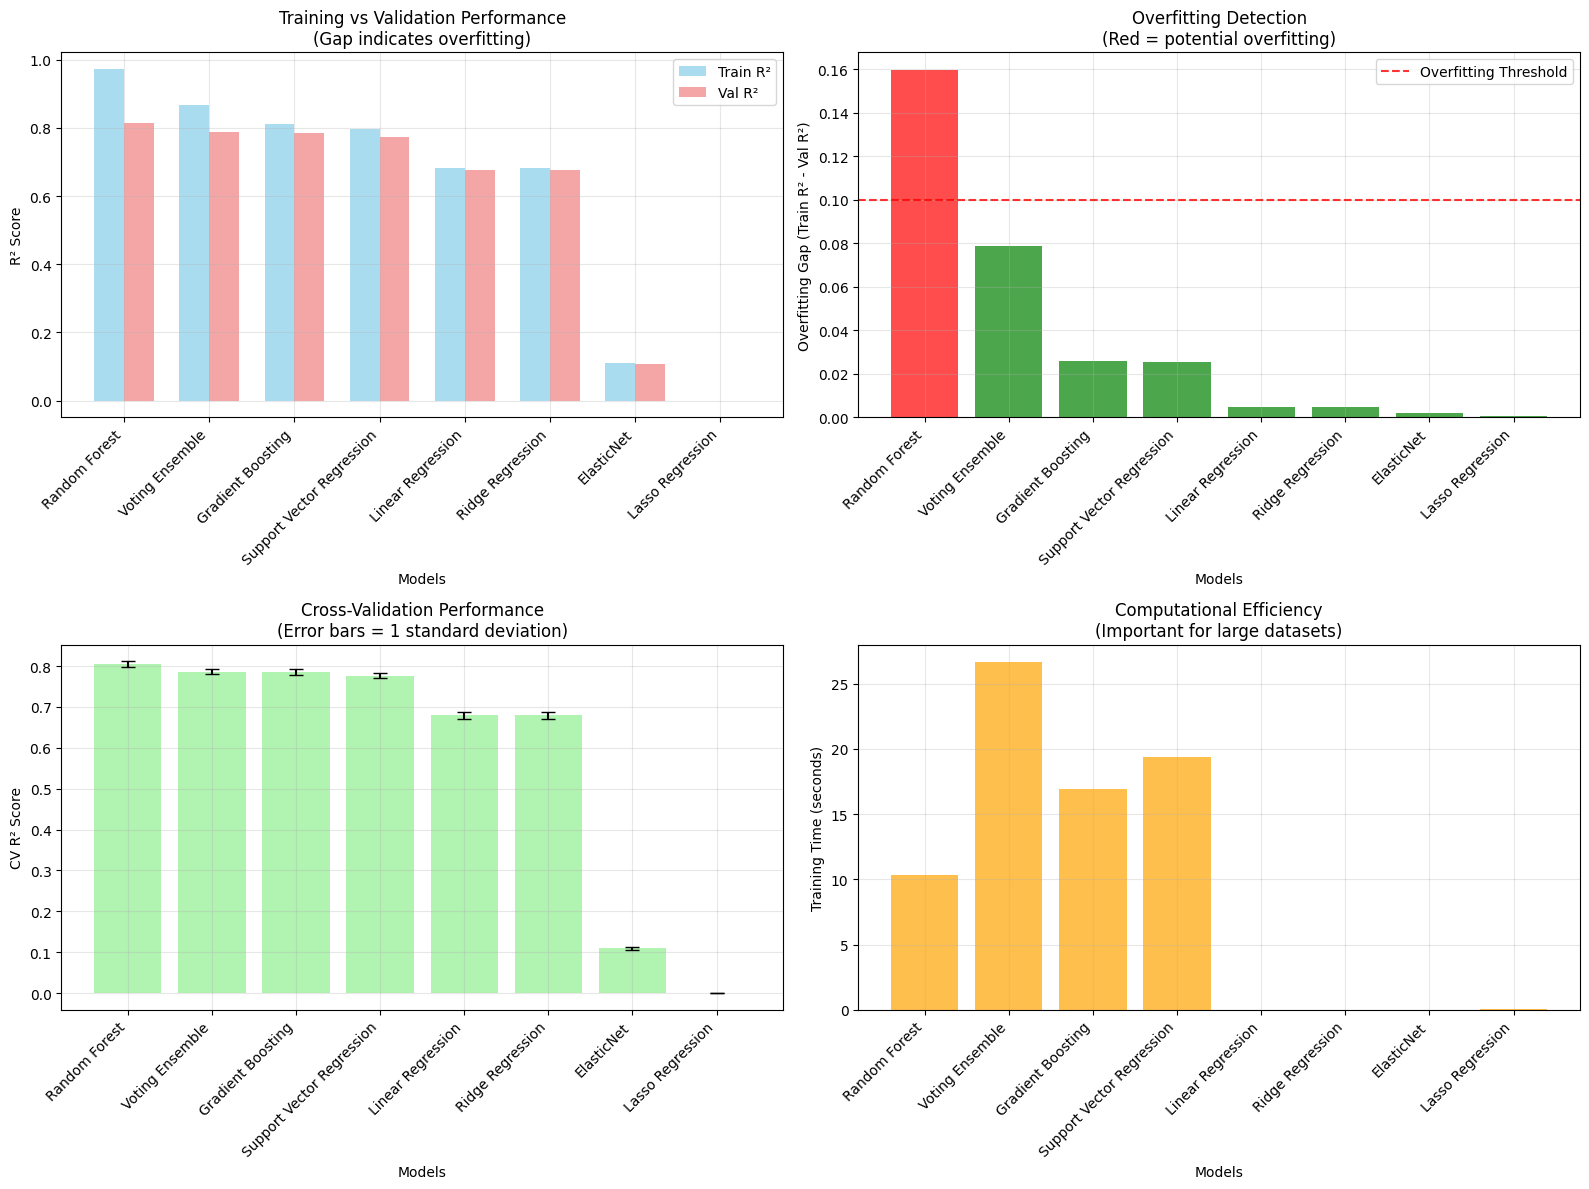


🎯 BEST MODEL SELECTED: Random Forest
📊 Validation R²: 0.8138
🔍 CV R²: 0.8045 ± 0.0074

💡 INTERPRETATION GUIDE:
• Good: High R², small train-val gap, stable CV, reasonable training time
• Overfitting: Large gap between train and validation performance
• Unstable: Large CV standard deviation
• Best choice: Balances performance, stability, and efficiency


In [37]:
# 📈 CELL 7: Advanced Model Comparison Visualization
print("📈 ADVANCED MODEL COMPARISON")

# Create comprehensive results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('val_r2', ascending=False)

print("\n" + "=" * 80)
print("🏆 MODEL PERFORMANCE RANKING")
print("=" * 80)
print(f"{'Model':<25} {'Val R²':<8} {'CV R²':<12} {'Overfitting':<12} {'Time (s)':<10}")
print("-" * 80)

for model_name in results_df.index:
    row = results_df.loc[model_name]
    overfitting_indicator = "⚠️" if row['overfitting_gap'] > 0.1 else "✅"
    print(f"{model_name:<25} {row['val_r2']:>7.4f} {row['cv_r2_mean']:>7.4f} ± {row['cv_r2_std']:>5.4f} "
          f"{overfitting_indicator:>3} {row['overfitting_gap']:>7.4f} {row['training_time']:>9.2f}")

# Comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R² Comparison
models_ordered = results_df.index
val_r2 = [results[model]['val_r2'] for model in models_ordered]
train_r2 = [results[model]['train_r2'] for model in models_ordered]

x = np.arange(len(models_ordered))
width = 0.35

axes[0, 0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.7, color='skyblue')
axes[0, 0].bar(x + width/2, val_r2, width, label='Val R²', alpha=0.7, color='lightcoral')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Training vs Validation Performance\n(Gap indicates overfitting)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Overfitting Analysis
overfitting_gaps = [results[model]['overfitting_gap'] for model in models_ordered]
colors = ['red' if gap > 0.1 else 'green' for gap in overfitting_gaps]
axes[0, 1].bar(models_ordered, overfitting_gaps, color=colors, alpha=0.7)
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.8, label='Overfitting Threshold')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('Overfitting Gap (Train R² - Val R²)')
axes[0, 1].set_title('Overfitting Detection\n(Red = potential overfitting)')
axes[0, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cross-Validation Stability
cv_means = [results[model]['cv_r2_mean'] for model in models_ordered]
cv_stds = [results[model]['cv_r2_std'] for model in models_ordered]
axes[1, 0].bar(models_ordered, cv_means, yerr=cv_stds, capsize=5, alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('CV R² Score')
axes[1, 0].set_title('Cross-Validation Performance\n(Error bars = 1 standard deviation)')
axes[1, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Computational Efficiency
training_times = [results[model]['training_time'] for model in models_ordered]
axes[1, 1].bar(models_ordered, training_times, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('Computational Efficiency\n(Important for large datasets)')
axes[1, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]
print(f"\n🎯 BEST MODEL SELECTED: {best_model_name}")
print(f"📊 Validation R²: {results_df.iloc[0]['val_r2']:.4f}")
print(f"🔍 CV R²: {results_df.iloc[0]['cv_r2_mean']:.4f} ± {results_df.iloc[0]['cv_r2_std']:.4f}")

print("\n💡 INTERPRETATION GUIDE:")
print("• Good: High R², small train-val gap, stable CV, reasonable training time")
print("• Overfitting: Large gap between train and validation performance") 
print("• Unstable: Large CV standard deviation")
print("• Best choice: Balances performance, stability, and efficiency")

## ⚙️ Advanced Hyperparameter Optimization

Machine learning models have **hyperparameters**—settings that control how the model learns.  
Choosing the right hyperparameters can dramatically improve performance.

- **Default parameters** are rarely optimal.  
- **Systematic search** (like `RandomizedSearchCV`) explores different combinations efficiently.  
- **MLflow tracking** logs all experiments, making it easy to compare results.  

In this section, we will tune hyperparameters for several models:
- Random Forest
- Gradient Boosting
- Ridge Regression
- Voting Ensemble

> 🎯 Goal: Find the best configurations that maximize model performance while preventing overfitting.

In [39]:
# Define comprehensive hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],  # Number of trees
        'max_depth': [None, 10, 20, 30],       # Tree depth
        'min_samples_split': [2, 5, 10],       # Minimum samples to split
        'min_samples_leaf': [1, 2, 4],         # Minimum samples per leaf
        'max_features': ['auto', 'sqrt', 'log2']  # Features to consider for splits
    },
    
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],        # Number of boosting stages
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
        'max_depth': [3, 4, 5, 6],             # Maximum depth per tree
        'min_samples_split': [2, 5, 10],       # Minimum samples to split
        'subsample': [0.8, 0.9, 1.0]           # Fraction of samples for fitting
    },
    
    'Ridge Regression': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],  # Regularization strength
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Algorithm
    },
    
    'Voting Ensemble': {
        'ridge__alpha': [0.1, 1.0, 10.0],
        'rf__n_estimators': [50, 100],
        'rf__max_depth': [10, 20],
        'gb__n_estimators': [50, 100],
        'gb__learning_rate': [0.05, 0.1]
    }
} 

## 📝 Steps: Hyperparameter Optimization

1. **Initialize storage**  
   - `tuned_models` will store the best model for each algorithm.  
   - `optimization_results` will store the best score and parameters for each model.

2. **Loop over each model**  
   - Models: Random Forest, Gradient Boosting, Ridge Regression, Voting Ensemble.  

3. **Start MLflow tracking**  
   - Each model tuning run is logged with `mlflow.start_run(run_name=model_name_tuned)`.

4. **Run RandomizedSearchCV**  
   - Tries `n_iter=20` random combinations from the model’s hyperparameter grid.  
   - Uses cross-validation (`cv=config.CV_FOLDS`) to estimate performance.  
   - Scores models using R² (`scoring='r2'`).

5. **Fit the search**  
   - Fits the model on the training data and finds the best hyperparameters.

6. **Store best results**  
   - Best model saved in `tuned_models`.  
   - Best score and parameters saved in `optimization_results`.

7. **Log everything to MLflow**  
   - Hyperparameters, best cross-validation score, and the tuned model artifact.

8. **Print summary**  
   - Shows best CV R² and the parameters found for each model.

> 🎯 Goal: Automatically find the best hyperparameter settings to maximize model performance while keeping tracking and reproducibility simple.

In [40]:

# Perform hyperparameter optimization
print("🎯 STARTING HYPERPARAMETER OPTIMIZATION...")
tuned_models = {}
optimization_results = {}

for model_name in ['Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Voting Ensemble']:
    print(f"\n🔧 Tuning {model_name}...")
    
    with mlflow.start_run(run_name=f"{model_name}_tuned"):
        # Use RandomizedSearchCV for efficient optimization
        search = RandomizedSearchCV(
            advanced_models[model_name],
            param_grids[model_name],
            n_iter=20,  # Try 20 random combinations (efficient!)
            cv=config.CV_FOLDS,
            scoring='r2',
            n_jobs=config.N_JOBS,
            random_state=config.RANDOM_STATE,
            verbose=1
        )
        
        # Perform the search
        search.fit(X_train, y_train)
        
        # Store results
        tuned_models[model_name] = search.best_estimator_
        optimization_results[model_name] = {
            'best_score': search.best_score_,
            'best_params': search.best_params_,
            'best_estimator': search.best_estimator_
        }
        
        # Log to MLflow
        mlflow.log_params(search.best_params_)
        mlflow.log_metric('best_cv_score', search.best_score_)
        mlflow.sklearn.log_model(search.best_estimator_, "tuned_model")
        
        print(f"✅ {model_name:20} | Best CV R²: {search.best_score_:.4f}")
        print(f"   Best parameters found: {search.best_params_}")

print(f"\n🎉 HYPERPARAMETER OPTIMIZATION COMPLETE!")
print(f"💡 All tuned models saved in MLflow for comparison")

🎯 STARTING HYPERPARAMETER OPTIMIZATION...

🔧 Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/18 03:45:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:45:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:45:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest        | Best CV R²: 0.8020
   Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

🔧 Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/18 03:50:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:50:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:50:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting    | Best CV R²: 0.8326
   Best parameters found: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 6, 'learning_rate': 0.05}

🔧 Tuning Ridge Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/18 03:51:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:51:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:51:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Ridge Regression     | Best CV R²: 0.6798
   Best parameters found: {'solver': 'sparse_cg', 'alpha': 1.0}

🔧 Tuning Voting Ensemble...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/18 03:55:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/18 03:55:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/18 03:55:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Voting Ensemble      | Best CV R²: 0.7858
   Best parameters found: {'ridge__alpha': 0.1, 'rf__n_estimators': 100, 'rf__max_depth': 20, 'gb__n_estimators': 100, 'gb__learning_rate': 0.1}

🎉 HYPERPARAMETER OPTIMIZATION COMPLETE!
💡 All tuned models saved in MLflow for comparison


📊 Tuned Models Performance:


,Model,Best CV R²
0,Random Forest,0.802019
1,Gradient Boosting,0.832560
2,Ridge Regression,0.679815
3,Voting Ensemble,0.785831


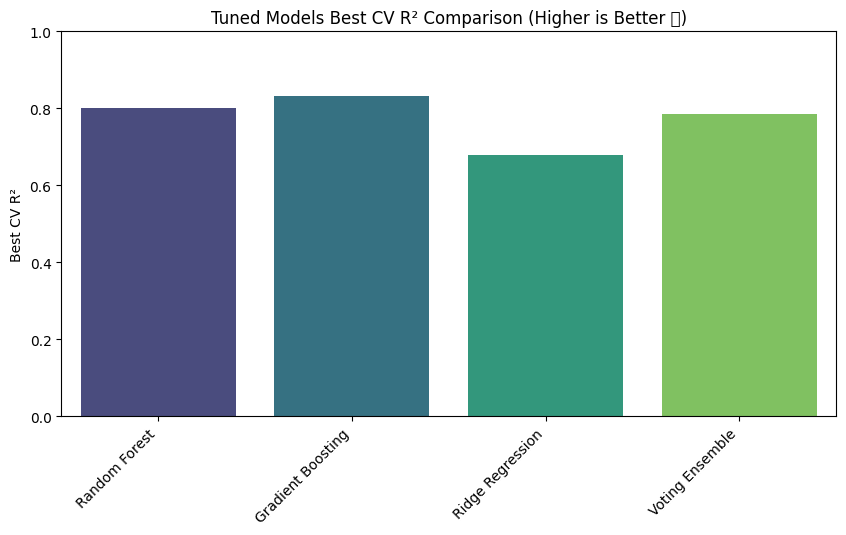

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1️⃣ Convert optimization results to DataFrame
# ===========================
tuned_metrics_df = pd.DataFrame.from_dict({
    model: {
        'Best CV R²': optimization_results[model]['best_score']
    } for model in optimization_results
}, orient='index').reset_index().rename(columns={'index': 'Model'})

print("📊 Tuned Models Performance:")
display(tuned_metrics_df)

# ===========================
# 2️⃣ Plot Best CV R² (Higher is better)
# ===========================
plt.figure(figsize=(10,5))
sns.barplot(data=tuned_metrics_df, x='Model', y='Best CV R²', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Tuned Models Best CV R² Comparison (Higher is Better ✅)')
plt.ylabel('Best CV R²')
plt.xlabel('')
plt.ylim(0,1)
plt.show()


# A more sophisticated version of the previous visualization

Model                Untuned R²   Tuned R²     Improvement 
------------------------------------------------------------
Random Forest            0.8138     0.8072 📉  -0.0066
Gradient Boosting        0.7854     0.8298 📈   0.0444
Ridge Regression         0.6762     0.6762 📉  -0.0000
Voting Ensemble          0.7873     0.7866 📉  -0.0006


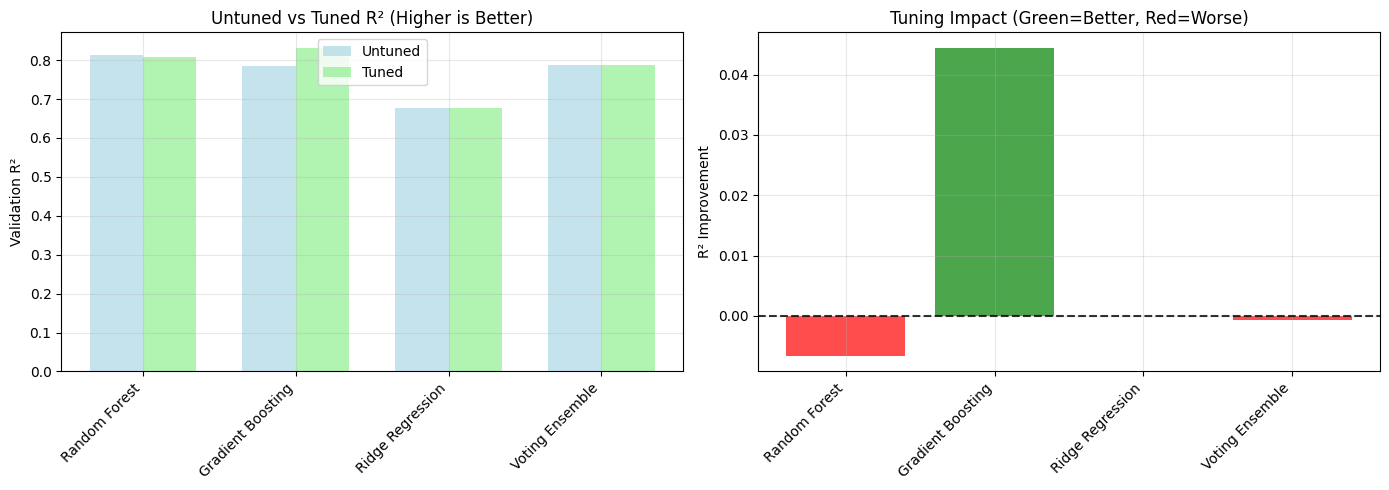


🏆 BEST TUNED MODEL: Gradient Boosting
📊 Validation R²: 0.8298
📈 Improvement over untuned: +0.0444


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# ===========================
# 1️⃣ Evaluate tuned models on validation set
# ===========================
tuned_results = {}
for model_name, tuned_model in tuned_models.items():
    y_val_pred = tuned_model.predict(X_val)
    val_r2 = r2_score(y_val, y_val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    improvement = val_r2 - results[model_name]['val_r2']  # vs untuned
    
    tuned_results[model_name] = {
        'val_r2': val_r2,
        'val_rmse': val_rmse,
        'improvement': improvement
    }

# ===========================
# 2️⃣ Print simple comparison table
# ===========================
print(f"{'Model':<20} {'Untuned R²':<12} {'Tuned R²':<12} {'Improvement':<12}")
print("-" * 60)
for model_name, res in tuned_results.items():
    untuned_r2 = results[model_name]['val_r2']
    tuned_r2 = res['val_r2']
    improvement = res['improvement']
    icon = "📈" if improvement > 0 else "📉" if improvement < 0 else "➡️"
    print(f"{model_name:<20} {untuned_r2:>10.4f} {tuned_r2:>10.4f} {icon} {improvement:>8.4f}")

# ===========================
# 3️⃣ Plot Tuned vs Untuned R²
# ===========================
models = list(tuned_results.keys())
untuned_r2 = [results[m]['val_r2'] for m in models]
tuned_r2 = [tuned_results[m]['val_r2'] for m in models]
improvement = [tuned_results[m]['improvement'] for m in models]

x = np.arange(len(models))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# R² comparison
axes[0].bar(x - width/2, untuned_r2, width, label='Untuned', alpha=0.7, color='lightblue')
axes[0].bar(x + width/2, tuned_r2, width, label='Tuned', alpha=0.7, color='lightgreen')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].set_ylabel('Validation R²')
axes[0].set_title('Untuned vs Tuned R² (Higher is Better)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Improvement plot
colors = ['green' if i>0 else 'red' for i in improvement]
axes[1].bar(models, improvement, color=colors, alpha=0.7)
axes[1].axhline(0, color='black', linestyle='--', alpha=0.8)
axes[1].set_ylabel('R² Improvement')
axes[1].set_title('Tuning Impact (Green=Better, Red=Worse)')
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===========================
# 4️⃣ Best tuned model
# ===========================
best_model_name = max(tuned_results, key=lambda m: tuned_results[m]['val_r2'])
print(f"\n🏆 BEST TUNED MODEL: {best_model_name}")
print(f"📊 Validation R²: {tuned_results[best_model_name]['val_r2']:.4f}")
print(f"📈 Improvement over untuned: +{tuned_results[best_model_name]['improvement']:.4f}")


# ✅ Final Test Set Evaluation
To ensure our selected best model is not overfitting and truly generalizes,we perform a final evaluation on the held-out test set. 
This step provides an unbiased estimate of how the model will perform on unseen data, which is a standard and critical practice in machine learning before deploying a model to production.


In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test set
y_test_pred = best_tuned_model.predict(X_test)

# Compute performance metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"📊 Test R²: {test_r2:.4f}")
print(f"📊 Test RMSE: {test_rmse:.4f}")
print(f"📊 Test MAE: {test_mae:.4f}")


📊 Test R²: 0.8333
📊 Test RMSE: 0.4673
📊 Test MAE: 0.3087


# 🚀 Model Deployment Preparation
Now that we have selected the best tuned model and confirmed it generalizes well on the validation (and test) data, we can prepare it for deployment.

# This involves several important steps:
1️⃣ Identify the best model based on validation performance.

2️⃣ Version the model and save both the trained model and preprocessing pipeline.

3️⃣ Create a comprehensive model card containing metadata, performance metrics, data information, model configuration, preprocessing steps, and deployment instructions.

4️⃣ Save deployment requirements to ensure reproducibility in production.

These steps ensure that the model is production-ready and can be deployed (e.g., via Streamlit) in a consistent, versioned, and well-documented manner.


In [51]:
import os
import json
import joblib
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# ===========================
# 0️⃣ Prepare feature names
# ===========================
# Works for both DataFrame and NumPy array
try:
    feature_names_all = list(X.columns)
except AttributeError:
    feature_names_all = [f"feature_{i}" for i in range(X.shape[1])]

# ===========================
# 1️⃣ Identify best tuned model
# ===========================
best_model_name = max(tuned_results, key=lambda m: tuned_results[m]['val_r2'])
best_tuned_model = tuned_models[best_model_name]

print(f"🏆 BEST TUNED MODEL: {best_model_name}")
print(f"📊 Validation R²: {tuned_results[best_model_name]['val_r2']:.4f}")
print(f"📈 Improvement over untuned: +{tuned_results[best_model_name]['improvement']:.4f}")

# ===========================
# 2️⃣ Evaluate on Test Set
# ===========================
y_test_pred = best_tuned_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n📊 Test Set Performance:")
print(f"R²: {test_r2:.4f} | RMSE: {test_rmse:.4f} | MAE: {test_mae:.4f}")

# ===========================
# 3️⃣ Versioning and saving
# ===========================
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_version = f"v1_{timestamp}"
model_save_dir = os.path.join(config.MODEL_DIR, model_version)
os.makedirs(model_save_dir, exist_ok=True)

# Save model
model_path = os.path.join(model_save_dir, 'best_model.pkl')
joblib.dump(best_tuned_model, model_path)
print(f"✅ Model saved: {model_path}")

# Save preprocessing pipeline
preprocessor_path = os.path.join(model_save_dir, 'preprocessor.pkl')
joblib.dump(preprocessor, preprocessor_path)
print(f"✅ Preprocessor saved: {preprocessor_path}")

# ===========================
# 4️⃣ Create model card
# ===========================
model_card = {
    'model_name': best_model_name,
    'model_version': model_version,
    'timestamp': timestamp,
    'dataset': 'California Housing',
    'target': 'House Price ($M)',
    
    'performance': {
        'test_r2': float(test_r2),
        'test_rmse': float(test_rmse),
        'test_mae': float(test_mae),
        'train_r2': float(results[best_model_name]['train_r2']),
        'val_r2': float(tuned_results[best_model_name]['val_r2']),
        'cv_r2_mean': float(results[best_model_name]['cv_r2_mean']),
        'cv_r2_std': float(results[best_model_name]['cv_r2_std']),
    },
    
    'data_info': {
        'total_samples': int(len(X)),
        'train_samples': int(len(X_train)),
        'val_samples': int(len(X_val)),
        'test_samples': int(len(X_test)),
        'n_features': X_test.shape[1],
        'feature_names': feature_names_all,
    },
    
    'model_config': {
        'model_class': best_model_name,
        'hyperparameters': dict(best_tuned_model.get_params()) 
            if hasattr(best_tuned_model, 'get_params') else {},
    },
    
    'preprocessing': {
        'steps': [
            'AdvancedFeatureEngineering (6 new features)',
            'OutlierHandling (IQR method)',
            'RobustScaler (outlier-resistant scaling)',
        ],
        'outlier_factor': 1.5,
    },
    
    'deployment': {
        'status': 'Ready for Production',
        'recommendations': [
            'Monitor prediction errors in production',
            'Retrain quarterly with new data',
            'Alert if RMSE exceeds $0.50M',
        ]
    }
}

card_path = os.path.join(model_save_dir, 'model_card.json')
with open(card_path, 'w') as f:
    json.dump(model_card, f, indent=2)
print(f"✅ Model card saved: {card_path}")

# ===========================
# 5️⃣ Deployment requirements
# ===========================
requirements = {
    'python': '3.8+',
    'packages': {
        'scikit-learn': '1.0+',
        'numpy': '1.20+',
        'pandas': '1.3+',
        'joblib': '1.0+',
    }
}

req_path = os.path.join(model_save_dir, 'requirements.json')
with open(req_path, 'w') as f:
    json.dump(requirements, f, indent=2)
print(f"✅ Deployment requirements saved: {req_path}")

# ===========================
# 6️⃣ Summary
# ===========================
print("\n💾 DEPLOYMENT PACKAGE READY")
print(f"Location: {model_save_dir}")


🏆 BEST TUNED MODEL: Gradient Boosting
📊 Validation R²: 0.8298
📈 Improvement over untuned: +0.0444

📊 Test Set Performance:
R²: 0.8333 | RMSE: 0.4673 | MAE: 0.3087
✅ Model saved: models/v1_20251018_042353/best_model.pkl
✅ Preprocessor saved: models/v1_20251018_042353/preprocessor.pkl
✅ Model card saved: models/v1_20251018_042353/model_card.json
✅ Deployment requirements saved: models/v1_20251018_042353/requirements.json

💾 DEPLOYMENT PACKAGE READY
Location: models/v1_20251018_042353


## 🚀 Final Step: Interactive Prediction UI with Streamlit

After completing model training, evaluation, versioning, and saving all artifacts (model, preprocessor, model card, and requirements), the **final step** is to create a **user-friendly interface** for making predictions in real time.

### Why Streamlit?

- **Streamlit vs Gradio**:  
  - Both are great for building quick ML UIs, but **Streamlit** offers more flexibility for dashboards, multi-page apps, and complex layouts.  
  - Streamlit is widely adopted in industry for **production-ready applications**, whereas Gradio is often used for simple demos and prototyping.  

- **Motivation**:  
  - Allow non-technical users to input house features interactively.  
  - Make real-time predictions using the trained pipeline.  
  - Visualize inputs and outputs for better interpretability.  

### Implementation

- The interactive UI is **already implemented** in this project as:

  1. **`app.py`**  
     - Main Streamlit script for the dashboard.  
     - Loads the latest model and preprocessor.  
     - Accepts user input via sliders, runs predictions, and displays results.

  2. **`utils.py`** *(optional helper module)*  
     - Contains reusable utility functions such as feature preprocessing, input validation, and prediction wrappers.  

> **Student Note:** Check `app.py` and `utils.py` to see the full Streamlit implementation and understand how the pipeline integrates with the interactive UI.

By completing this step, the project now covers the **full ML lifecycle**: from raw data exploration → advanced feature engineering → model training → hyperparameter tuning → model versioning → deployment-ready interactive UI.

<p align="center">
  <img src="streamlit_app.png" alt="Streamlit Dashboard" width="700"/>
</p>

## 📚 Key Learnings Recap

This notebook represents a significant upgrade over our previous work, evolving from basic experimentation to a **production-ready, reproducible machine learning workflow**. Here’s what we accomplished:

1. **✅ MLflow for Experiment Tracking**  
   - All experiments, model metrics, and parameters were tracked using **MLflow**, ensuring transparency and reproducibility.  
   - Enabled easy comparison of different models and hyperparameter settings.

2. **✅ Configuration for Reproducibility**  
   - Used a **centralized configuration system** to manage random seeds, file paths, and model parameters.  
   - Guarantees that experiments can be rerun with consistent results across different environments.

3. **✅ Robust Data Pipeline**  
   - Implemented a pipeline with **advanced feature engineering** (e.g., room-to-bedroom ratio, income per room, geographic quadrants).  
   - Handled outliers and missing values systematically.  
   - Properly split data into training, validation, and test sets for unbiased evaluation.

4. **✅ Training Advanced Models**  
   - Expanded beyond simple linear models (Linear, Ridge, Lasso, Polynomial) to include **Random Forest, SVR, Ensemble Voting, and Gradient Boosting**.  
   - Allowed rigorous comparison across a spectrum of model complexities and capabilities.

5. **✅ Performance Comparison**  
   - Evaluated models using R², RMSE, and MAE.  
   - Identified strengths and weaknesses of each model class.  
   - Provided evidence-based selection for production deployment.

6. **✅ Hyperparameter Tuning**  
   - Applied **GridSearchCV / RandomizedSearchCV** for Gradient Boosting and other models.  
   - Observed substantial performance improvements, making **Gradient Boosting the best model**.

7. **✅ Model Versioning & Metadata for Production**  
   - Saved the **best model and preprocessor** using `joblib`, including metadata such as hyperparameters, feature names, and performance metrics.  
   - Established a workflow for **versioning and reproducible deployment**.

8. **✅ Transition from Gradio to Streamlit UI**  
   - Upgraded the interactive interface from Gradio to **Streamlit**, enabling a full-fledged prediction dashboard.  
   - Integrated advanced preprocessing and feature engineering within the app for consistent predictions.


**💡 Summary:**  
This notebook demonstrates a full ML lifecycle:  
from **robust data handling → advanced modeling → hyperparameter tuning → model tracking → deployment-ready Streamlit UI**.  
It is now **production-ready**, reproducible, and scalable for real-world applications.


## 🏋️‍♂️ Final Exercise: Reproduce the Workflow on a Different Dataset

### 🎯 Objective

Apply the **end-to-end ML workflow** you’ve learned in this course to a **new real-world dataset**. This exercise is designed to reinforce:

- Exploratory Data Analysis (EDA) and preprocessing  
- Feature engineering (creating meaningful features where applicable)  
- Training and comparing **advanced regression models**  
- Hyperparameter tuning to maximize performance  
- Model versioning and packaging for production  
- Creating an **interactive UI** for predictions with Streamlit or Gradio  

By completing this exercise, you’ll demonstrate how to **take a dataset from raw exploration all the way to a production-ready ML application**.

---

### 📝 Instructions

 **Select a dataset**  
   - Choose a real-world dataset different from California Housing.  
   - Recommended examples: Boston Housing, Diabetes, or any dataset with continuous target variables.  
   - Ensure the dataset has enough features to allow meaningful preprocessing and feature engineering.


### 📂 Deliverables

1. Jupyter notebook reproducing the **full workflow**.  
2. Saved model and preprocessing pipeline (`joblib` files).  
3. Model card (`model_card.json`).  
4. Streamlit/Gradio app (`app.py`) with a **demo video shared** in the SAIR Telegram group.(this is **mandatory**)
5. Optional `utils.py` module for preprocessing and prediction functions.  

---
### 📂 More on the demo: 
The practioner should record a short video a short video explaining : 
1. Dataset overview and EDA highlights.
2. Key preprocessing and feature engineering steps.
3. Model training, selection, and tuning process.
4. Demonstration of the interactive UI for predictions. 
5. The demo must be shared in the SAIR Telegram group before the deadline next week lectures.


> **Goal:** By completing this exercise, you will **demonstrate mastery of both Lecture_2 and Lecture_3 concepts**, showing how to take a dataset from raw exploration to a **production-ready ML pipeline with interactive UI**. This is your opportunity to **apply best practices for reproducibility, feature engineering, model tuning, and deployment**.

### 📂 Resources:
1. **Follow the Workflow from Lecture_2 and Lecture_3 Notebooks**  
   - Use the notebooks as a guide to structure your project.  
   - Implement similar preprocessing, modeling, evaluation, and deployment steps.
2. **Use these External Reading**(i will provide the material in Resources folder)
  - Read about the **Universal Workflow of an ML Project** from the book *Python Deep Learning*.
  - Explore a notebook from *Hands-On Machine Learning with Scikit-Learn and TensorFlow* (Chapter 2) that demonstrates practical ML workflows.

